### How to push to github
##### Write the following in the git terminal:
##### git add *
##### git commit -m "Write the changes in the file that were done here"
##### git push

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import kn
from scipy.integrate import quad
import csv
from scipy import optimize
from scipy import integrate
from scipy.integrate import odeint
import pandas as pd

Frozen-out value of TestMeson with sigma = 1e-18, and mass = 10 GeV is [0.00183902]
Frozen-out value of TestBaryon with sigma = 1e-17, and mass = 10 GeV is [0.00029914]
Frozen-out value of TestMeson2 with sigma = 1e-16, and mass = 10 GeV is [4.31984409e-05]


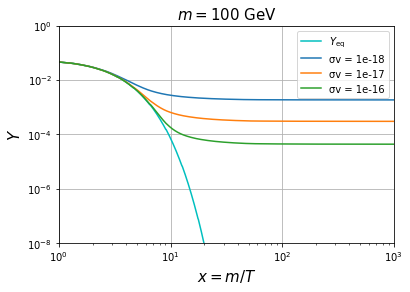

In [25]:
%run FreezeOutFunctions.ipynb
%run CrossSectionFunctions.ipynb

particles = ["TestMeson", "TestBaryon", "TestMeson2"]

x=np.logspace(np.log10(1),np.log10(1000),10000)
xx=np.logspace(np.log10(1),np.log10(1000),1000)
plt.loglog(xx,Y_EQ(xx, particle),'c',label=r'$Y_{\rm eq}$')

for particle in particles:
    cross_section = particle_cross_sections.get(particle,1)
    mass = particle_mass.get(particle,1)
    k=fk(particle)
    Y=integrate.odeint(dYdx,Y_EQ(x[0], particle), x, args=(particle,))
    print(f'Frozen-out value of {particle} with sigma = {cross_section}, and mass = {mass} GeV is {Y[-1]}')
    plt.loglog(x,Y,label=f'σv = {cross_section}')

    
plt.ylim(1E-8,1)
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$m = 100$ GeV', size= 15)
plt.legend()
plt.grid()

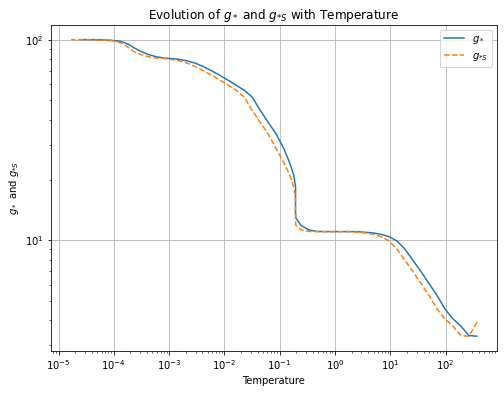

In [3]:
# Load the data
Gstar_df = pd.read_csv("Gstar.csv", header = None)
GstarS_df = pd.read_csv("GstarS.csv", header = None)

# Convert to dictionaries while preserving order
Gstar = dict(zip(Gstar_df.iloc[:, 0], Gstar_df.iloc[:, 1]))
GstarS = dict(zip(GstarS_df.iloc[:, 0], GstarS_df.iloc[:, 1]))


# Extract temperature values and corresponding function values in original order
temps_Gstar = Gstar_df.iloc[:, 0].values  # Keep order from CSV
values_Gstar = np.flip(Gstar_df.iloc[:, 1].values)  

temps_GstarS = GstarS_df.iloc[:, 0].values  # Keep order from CSV
values_GstarS = np.flip(GstarS_df.iloc[:, 1].values)  

# Plot the functions
plt.figure(figsize=(8, 6))
plt.plot(temps_Gstar, values_Gstar, label="$g_*$", linestyle="-")
plt.plot(temps_GstarS, values_GstarS, label="$g_{*S}$", linestyle="--")
plt.xscale('log')

plt.yscale('log')

# Labels and title
plt.xlabel("Temperature")
plt.ylabel("$g_*$ and $g_{*S}$")
plt.title("Evolution of $g_*$ and $g_{*S}$ with Temperature")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [4]:
"""
Y0 = [1e5]  
x_min = 1e-5 
x_max = 100
x_span = (x_min, x_max)
x_eval = np.geomspace(x_min, x_max, 5000)

# THE STRING ENCLOSED WITHIN THE "" IS TELLING THE CODE WHAT RATIO TO USE REGARDLESS OF WHAT VARIABLE YOU PASS THROUGH NEXT
sigma_values = {
    "TestMeson": Sigma_Meson,
    #"TestBaryon": Sigma_Baryon
}

for particle, sigma_value in sigma_values.items():
    sol = solve_ivp(lambda x, Y: dYdx(x, Y, particle), x_span, Y0, t_eval=x_eval)
    print(particle)

    sol_Y0 = solve_ivp(lambda x, Y: dYdx(1, Y, particle), x_span, Y0, dense_output=True)
    y0 = lambda Y: sol_Y0.sol(Y)[0]
    print(f'y(0) = {y0(0)}')    

    # Number of frozen-out DM particles
    Y_frozen = sol.y[0, -1]
    print(f'Frozen-out Y(x) for {particle} = {Y_frozen}')
    print(f'Cross section of {particle} = {sigma_value}')
    
    plt.plot(sol.t, sol.y[0]/y0(0), label=f'{particle}')
    
# Plot configurations
plt.yscale('log')  
plt.xscale('log')  
plt.xlabel('log(x = m/T)')
plt.ylabel('log(Y/Y(x=0))')
plt.title('Log plot of Y(x) for different $\sigma$ values')
plt.legend()
plt.grid(True)
#plt.savefig('DifferentSigmaSValues.png', facecolor='w')

plt.show()
"""

'\nY0 = [1e5]  \nx_min = 1e-5 \nx_max = 100\nx_span = (x_min, x_max)\nx_eval = np.geomspace(x_min, x_max, 5000)\n\n# THE STRING ENCLOSED WITHIN THE "" IS TELLING THE CODE WHAT RATIO TO USE REGARDLESS OF WHAT VARIABLE YOU PASS THROUGH NEXT\nsigma_values = {\n    "TestMeson": Sigma_Meson,\n    #"TestBaryon": Sigma_Baryon\n}\n\nfor particle, sigma_value in sigma_values.items():\n    sol = solve_ivp(lambda x, Y: dYdx(x, Y, particle), x_span, Y0, t_eval=x_eval)\n    print(particle)\n\n    sol_Y0 = solve_ivp(lambda x, Y: dYdx(1, Y, particle), x_span, Y0, dense_output=True)\n    y0 = lambda Y: sol_Y0.sol(Y)[0]\n    print(f\'y(0) = {y0(0)}\')    \n\n    # Number of frozen-out DM particles\n    Y_frozen = sol.y[0, -1]\n    print(f\'Frozen-out Y(x) for {particle} = {Y_frozen}\')\n    print(f\'Cross section of {particle} = {sigma_value}\')\n    \n    plt.plot(sol.t, sol.y[0]/y0(0), label=f\'{particle}\')\n    \n# Plot configurations\nplt.yscale(\'log\')  \nplt.xscale(\'log\')  \nplt.xlabel(\'log(

In [5]:
"""
%run FreezeOutFunctions.ipynb
%run CrossSectionFunctions.ipynb

#Y0 = [10]  
x_min = 1e-2 
x_max = 100
x_span = (x_min, x_max)
x_eval = np.geomspace(x_min, x_max, 5000)
xx=np.logspace(np.log10(1.1),np.log10(1e100),1000)
xx = np.log10(xx)

sigma_values = ["TestMeson"]#, "TestBaryon", "TestMeson2", "TestMeson3", "TestMeson4", "TestMeson5"]


for particle in sigma_values:
    Y0 = [YInitial(particle)]
    sol = solve_ivp(lambda x, Y: dYdx(x, Y, particle), (np.log10(1.1),np.log10(1e100)), Y0, t_eval=xx)

    sol_Y0 = solve_ivp(lambda x, Y: dYdx(1, Y, particle), x_span, Y0, dense_output=True)
    y0 = lambda Y: sol_Y0.sol(Y)[0]
    #print(f'y(0) = {y0(0)}')
    
    # Number of frozen-out DM particles
    #print(sol.y)
    Y_frozen = sol.y[0, -1]
    print(f'Frozen-out Y(x) for {particle} = {Y_frozen}')
    
    plt.loglog(sol.t, sol.y[0], label=f'{particle}')

Y = Y_EQ(xx, "TestMeson")
plt.loglog(xx, Y, label="Y_EQ")

# Plot configurations
#plt.yscale('log')  
#plt.xscale('log')  
plt.xlabel('log(x = m/T)')
plt.ylabel('log(Y/Y(0))')
plt.title('Log plot of Y(x) for different $\sigma$ values')
plt.legend()
plt.grid(True)
#plt.ylim(1e-15, 15)
#plt.savefig('DifferentSigmaSValues.png', facecolor='w')

plt.show()
"""

'\n%run FreezeOutFunctions.ipynb\n%run CrossSectionFunctions.ipynb\n\n#Y0 = [10]  \nx_min = 1e-2 \nx_max = 100\nx_span = (x_min, x_max)\nx_eval = np.geomspace(x_min, x_max, 5000)\nxx=np.logspace(np.log10(1.1),np.log10(1e100),1000)\nxx = np.log10(xx)\n\nsigma_values = ["TestMeson"]#, "TestBaryon", "TestMeson2", "TestMeson3", "TestMeson4", "TestMeson5"]\n\n\nfor particle in sigma_values:\n    Y0 = [YInitial(particle)]\n    sol = solve_ivp(lambda x, Y: dYdx(x, Y, particle), (np.log10(1.1),np.log10(1e100)), Y0, t_eval=xx)\n\n    sol_Y0 = solve_ivp(lambda x, Y: dYdx(1, Y, particle), x_span, Y0, dense_output=True)\n    y0 = lambda Y: sol_Y0.sol(Y)[0]\n    #print(f\'y(0) = {y0(0)}\')\n    \n    # Number of frozen-out DM particles\n    #print(sol.y)\n    Y_frozen = sol.y[0, -1]\n    print(f\'Frozen-out Y(x) for {particle} = {Y_frozen}\')\n    \n    plt.loglog(sol.t, sol.y[0], label=f\'{particle}\')\n\nY = Y_EQ(xx, "TestMeson")\nplt.loglog(xx, Y, label="Y_EQ")\n\n# Plot configurations\n#plt.ysc

In [6]:
"""
from scipy import optimize
from scipy import integrate
from scipy.integrate import odeint

Mp = M_Pl

def fk(particle):
    mass = particle_mass.get(particle,1)
    cross_section = particle_cross_sections.get(particle,1)
    return np.sqrt(np.pi*Mp**2/45)*mass*cross_section

def Y_EQ(x, particle):
    mass = particle_mass.get(particle, 1)
    return n_eq(x, particle) / s(x, particle)

def BEx(x, particle):
    mass = particle_mass.get(particle,1)
    T=mass/x

    return k*g_star(T)/x**2

def BE(Y,x,particle):
    return -(Y**2-Y_EQ(x, particle)**2)*BEx(x, particle)
"""

'\nfrom scipy import optimize\nfrom scipy import integrate\nfrom scipy.integrate import odeint\n\nMp = M_Pl\n\ndef fk(particle):\n    mass = particle_mass.get(particle,1)\n    cross_section = particle_cross_sections.get(particle,1)\n    return np.sqrt(np.pi*Mp**2/45)*mass*cross_section\n\ndef Y_EQ(x, particle):\n    mass = particle_mass.get(particle, 1)\n    return n_eq(x, particle) / s(x, particle)\n\ndef BEx(x, particle):\n    mass = particle_mass.get(particle,1)\n    T=mass/x\n\n    return k*g_star(T)/x**2\n\ndef BE(Y,x,particle):\n    return -(Y**2-Y_EQ(x, particle)**2)*BEx(x, particle)\n'

In [7]:
"""
%run CrossSectionFunctions.ipynb

xx=np.logspace(np.log10(1),np.log10(1000),1000)
plt.loglog(xx,Y_EQ(xx, particle),'c',label=r'$Y_{\rm eq}$')

k=fk("TestMeson")
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Y_EQ(x[0], particle),x, args=(particle,))
plt.loglog(x,Y,'r--',label=r'$\langle \sigma v \rangle = 10^{-18}\ {\rm GeV}^{-2}$')


plt.ylim(1E-14,1)
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$m = 100$ GeV', size= 15)
plt.legend()
plt.grid()
"""

'\n%run CrossSectionFunctions.ipynb\n\nxx=np.logspace(np.log10(1),np.log10(1000),1000)\nplt.loglog(xx,Y_EQ(xx, particle),\'c\',label=r\'$Y_{\rm eq}$\')\n\nk=fk("TestMeson")\nx=np.logspace(np.log10(1),np.log10(1000),10000)\nY=integrate.odeint(BE,Y_EQ(x[0], particle),x, args=(particle,))\nplt.loglog(x,Y,\'r--\',label=r\'$\\langle \\sigma v \rangle = 10^{-18}\\ {\rm GeV}^{-2}$\')\n\n\nplt.ylim(1E-14,1)\nplt.xlim(1,1000)\nplt.xlabel(\'$x = m/T$\', size= 15)\nplt.ylabel(\'$Y$\', size= 15)\nplt.title(\'$m = 100$ GeV\', size= 15)\nplt.legend()\nplt.grid()\n'